In [138]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

filePathMenu = 'XTern 2024 Artificial Intelegence Data Set - Menu.csv'
filePathData = 'XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv'


### Import data

In [140]:
dfMenu = pd.read_csv(filePathMenu)
dfData = pd.read_csv(filePathData)


In [141]:
dfMenu.head()

,Unnamed: 0,Item,Price,Calories
0,0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,1,Cornbread Hush Puppies,5,250
2,2,Breaded Pork Tenderloin Sandwich,9,550
3,3,Indiana Pork Chili,7,300
4,4,Fried Catfish Basket,10,600


In [142]:
dfData.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


### Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data.

              Time
count  5000.000000
mean     12.528200
std       1.357193
min       8.000000
25%      12.000000
50%      13.000000
75%      13.000000
max      17.000000
Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


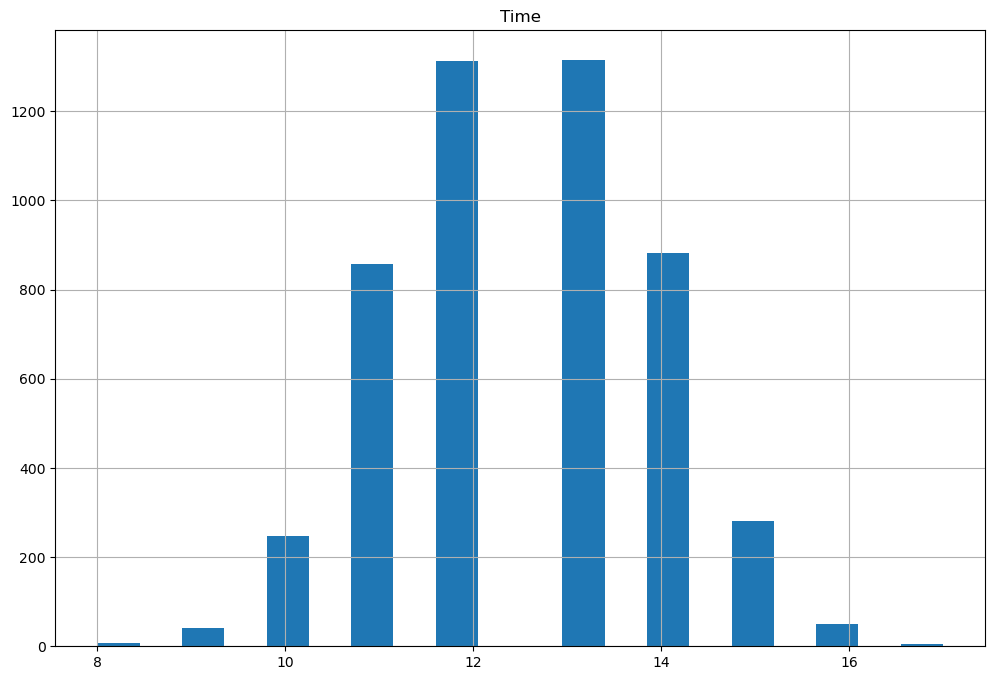

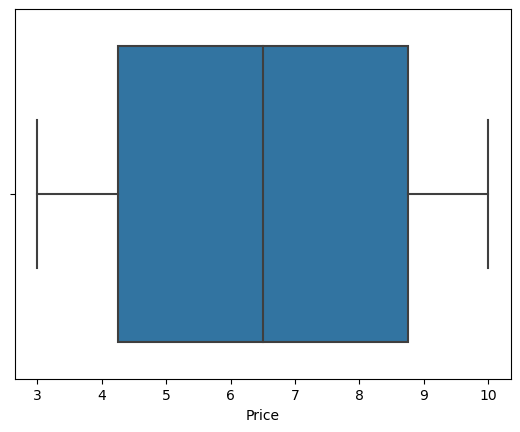

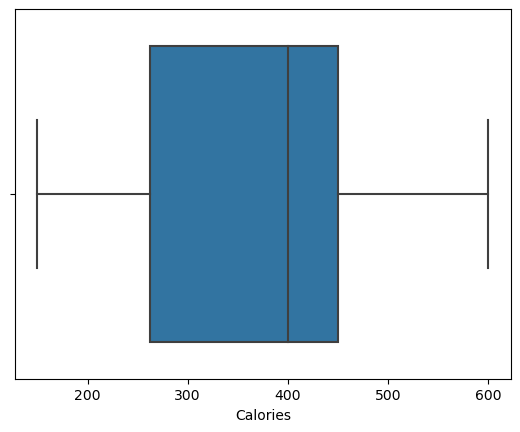

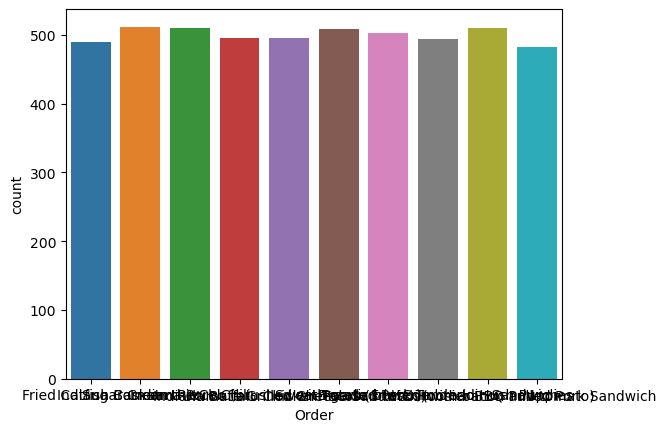

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


# Summary statistics
print(dfData.describe())

# Checking for missing values
print(dfData.isnull().sum())

# Histograms
dfData.hist(bins=20, figsize=(12, 8))
plt.show()

# Box plot
sns.boxplot(x='Price', data=dfMenu)
plt.show()

# Box plot
sns.boxplot(x='Calories', data=dfMenu)
plt.show()

# Bar plot for categorical feature
sns.countplot(x='Order', data=dfData)
plt.show()


### Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications



##### Discuss Ethical implications of these factors

sfd

##### Discuss Business outcome implications of these factors


wer

##### Discuss Technical implications of these factors


efsf

### Build a model to predict a customers order from their available information.

You will be graded largely on your intent and process when designing the model, performance is secondary. It is strongly suggested that you use SKLearn for this model as to not take too much time.  You may use any kind implementation you would like though, but it must be pickelable and have a “.predict()” method similar to SKLearn


#### Outline your process for model selection, training and testing. Including data preparation.

In [16]:
dfMenu.head()

,Unnamed: 0,Item,Price,Calories
0,0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,1,Cornbread Hush Puppies,5,250
2,2,Breaded Pork Tenderloin Sandwich,9,550
3,3,Indiana Pork Chili,7,300
4,4,Fried Catfish Basket,10,600


In [17]:
dfData.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


So, all the string data has to be put into number format for the interpreter to work. Given that we have 5,000 rows of data, I think an 80-20 split would be fine (80% of the data used for training, 20% of the data used for testing). The Major and University data can be changed into numerical values using one-hot-encoder. The time data is already a numerical value, and the year data can be changed into numerical values by keeping the year number alone. 


In [143]:
dfMenu = pd.read_csv(filePathMenu)
dfData = pd.read_csv(filePathData)


In [144]:
# All of the columns have their purpose, so no columns need to be removed. 

# Converting year into a numerical column
for r in range(len(dfData)):
        temp = dfData.at[r, 'Year']
        tempNum = ''.join(filter(str.isdigit, temp))
        dfData.at[r, 'Year'] = int(tempNum)

# Splitting the data into features
X = dfData.drop("Order", axis=1)
y = dfData["Order"]

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Train set shape:", X_train.shape, y_train.shape)
print("Train set shape:", X_test.shape, y_test.shape)

# Seperate the DF into seperate columns
categorical = ['Major', 'University']
Xtrain_cat = pd.DataFrame({'Major': X_train['Major'], 'University': X_train['University']})
Xtest_cat = pd.DataFrame({'Major': X_test['Major'], 'University': X_test['University']})

# One hot encoding the data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Xtrain_cat)
X_train_enc = enc.transform(Xtrain_cat).toarray()
X_test_enc = enc.transform(Xtest_cat).toarray()

Xtrain_first = pd.DataFrame({'Year': X_train['Year']}).to_numpy()
Xtrain_last = pd.DataFrame({'Time': X_train['Time']}).to_numpy()

Xtest_first = pd.DataFrame({'Year': X_test['Year']}).to_numpy()
Xtest_last = pd.DataFrame({'Time': X_test['Time']}).to_numpy()

final_train = np.hstack((Xtrain_first, X_train_enc, Xtrain_last))
final_test = np.hstack((Xtest_first, X_test_enc, Xtest_last))


Train set shape: (4000, 4) (4000,)
Train set shape: (1000, 4) (1000,)


In [145]:
# Create the model: 
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import metrics  


In [146]:
X_train_model = final_train
X_test_model = final_test
y_train_model = y_train
y_test_model = y_test

In [147]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_model, y_train_model)

y_pred_test = clf.predict(X_test_model)
y_pred_train = clf.predict(X_train_model)


In [148]:
# Pickle the trained model

import pickle

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)


### Model has been trained, now its time to see how the model turned out

In [149]:
print(metrics.classification_report(y_train_model, y_pred_train, zero_division=0, digits=4))

                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich     0.7611    0.5887    0.6639       406
                                  Cornbread Hush Puppies     0.6945    0.7029    0.6987       414
                                    Fried Catfish Basket     0.7549    0.6997    0.7263       383
                        Hoosier BBQ Pulled Pork Sandwich     0.7550    0.7763    0.7655       389
                 Indiana Buffalo Chicken Tacos (3 tacos)     0.7143    0.6010    0.6528       391
    Indiana Corn on the Cob (brushed with garlic butter)     0.7677    0.8686    0.8150       388
                                      Indiana Pork Chili     0.7802    0.8965    0.8343       396
                                         Sugar Cream Pie     0.7077    0.7421    0.7245       411
                                      Sweet Potato Fries     0.7460    0.6659    0.7037       419
Ultimate Grilled Ch

In [150]:
print(metrics.classification_report(y_test_model, y_pred_test, zero_division=0, digits=4))

                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich     0.5541    0.4659    0.5062        88
                                  Cornbread Hush Puppies     0.5521    0.5521    0.5521        96
                                    Fried Catfish Basket     0.7333    0.6168    0.6701       107
                        Hoosier BBQ Pulled Pork Sandwich     0.6632    0.6774    0.6702        93
                 Indiana Buffalo Chicken Tacos (3 tacos)     0.5368    0.4857    0.5100       105
    Indiana Corn on the Cob (brushed with garlic butter)     0.6960    0.8131    0.7500       107
                                      Indiana Pork Chili     0.7600    0.8333    0.7950       114
                                         Sugar Cream Pie     0.6344    0.5842    0.6082       101
                                      Sweet Potato Fries     0.5488    0.5056    0.5263        89
Ultimate Grilled Ch

In [151]:
featImp = pd.Series(clf.feature_importances_)
featImp.sort_values(ascending = False)

30    0.298951
0     0.133260
21    0.052360
23    0.049081
22    0.042510
25    0.041709
13    0.037368
3     0.032770
8     0.032755
4     0.030534
5     0.029052
18    0.027983
12    0.027071
6     0.026851
17    0.026029
28    0.018104
9     0.017909
2     0.014145
27    0.013238
19    0.012947
1     0.012206
11    0.005091
20    0.004987
15    0.003935
14    0.002451
24    0.002203
29    0.001456
16    0.001152
7     0.001035
10    0.000646
26    0.000213
dtype: float64